In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import xgboost as xgb

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('/home/abdelhaq/Documents/Tseries/archive/PJMW_hourly.csv')


In [3]:
df.tail()

,Datetime,PJMW_MW
143201,2018-01-01 20:00:00,8401.0
143202,2018-01-01 21:00:00,8373.0
143203,2018-01-01 22:00:00,8238.0
143204,2018-01-01 23:00:00,7958.0
143205,2018-01-02 00:00:00,7691.0


In [4]:
df = pd.read_csv('/home/abdelhaq/Documents/Tseries/archive/PJMW_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

Train / Test Split


<Axes: title={'center': 'PJME energy used'}, xlabel='Datetime'>

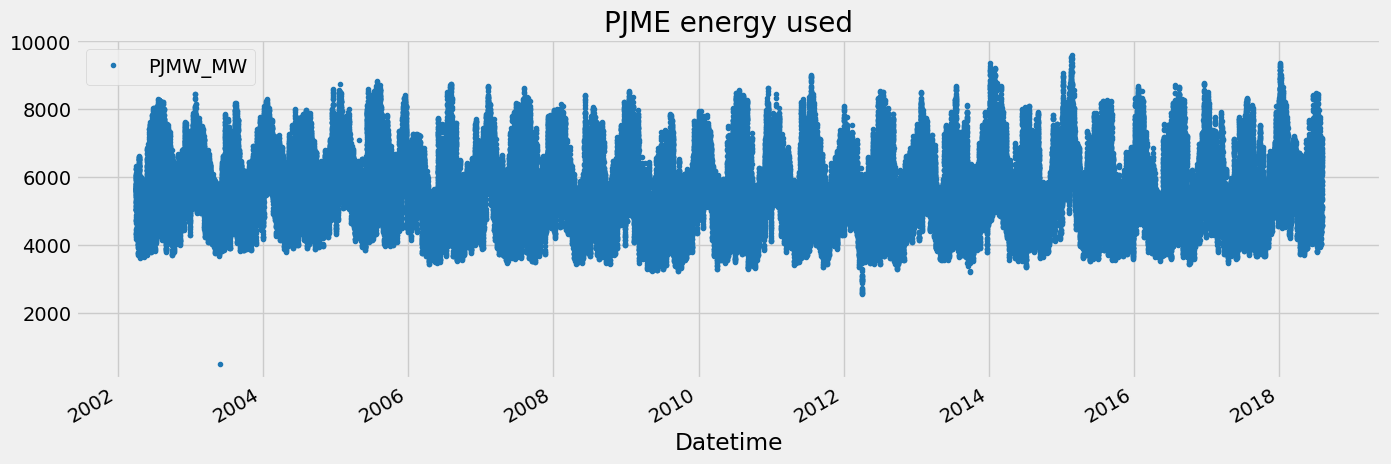

In [5]:
df.plot(style='.', figsize=(15, 5),color=color_pal[0], title='PJME energy used')

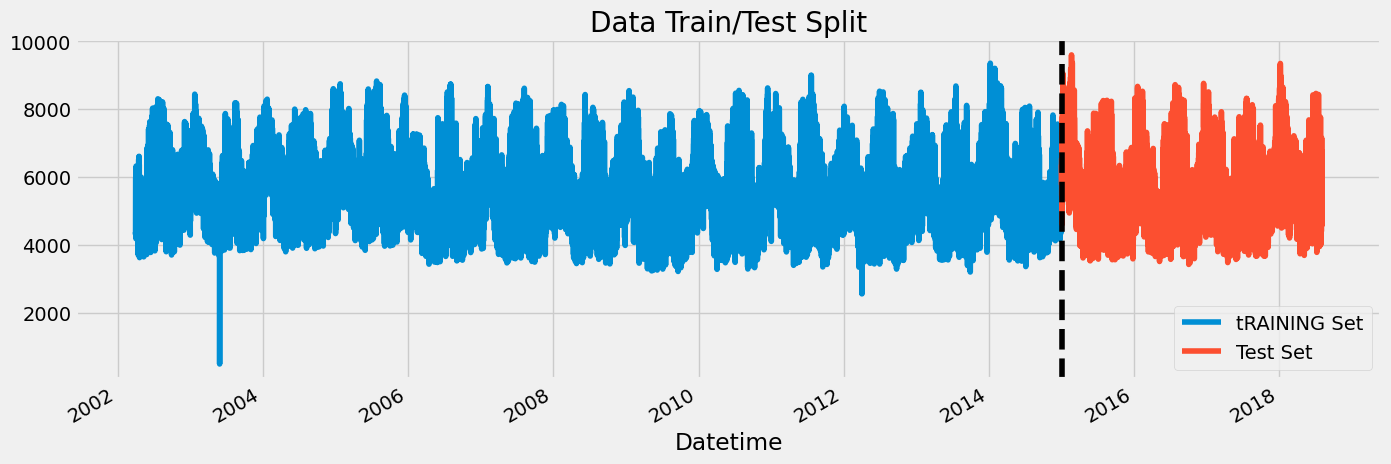

In [6]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15, 5))

train.plot(ax=ax, label='training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['tRAINING Set', 'Test Set'])
plt .show()

In [7]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')]

,PJMW_MW
Datetime,
2010-01-07 01:00:00,6256.0
2010-01-07 02:00:00,6073.0
2010-01-07 03:00:00,6090.0
2010-01-07 04:00:00,6101.0
2010-01-07 05:00:00,6211.0
...,...
2010-01-01 20:00:00,6461.0
2010-01-01 21:00:00,6414.0
2010-01-01 22:00:00,6285.0


In [8]:
def create_feature(df):

    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year


    df['dayofyear'] = df.index.dayofyear

return df

df = create_feature(df)

SyntaxError: 'return' outside function (2679085771.py, line 12)

In [12]:

#visualiser our feautre /target

Index(['Datetime', 'PJMW_MW', 'mounth'], dtype='object')
             Datetime  PJMW_MW  mounth
0 2002-12-31 01:00:00   5077.0      12
1 2002-12-31 02:00:00   4939.0      12
2 2002-12-31 03:00:00   4885.0      12
3 2002-12-31 04:00:00   4857.0      12
4 2002-12-31 05:00:00   4930.0      12


ValueError: Could not interpret value `NI_MW` for `y`. An entry with this name does not appear in `data`.

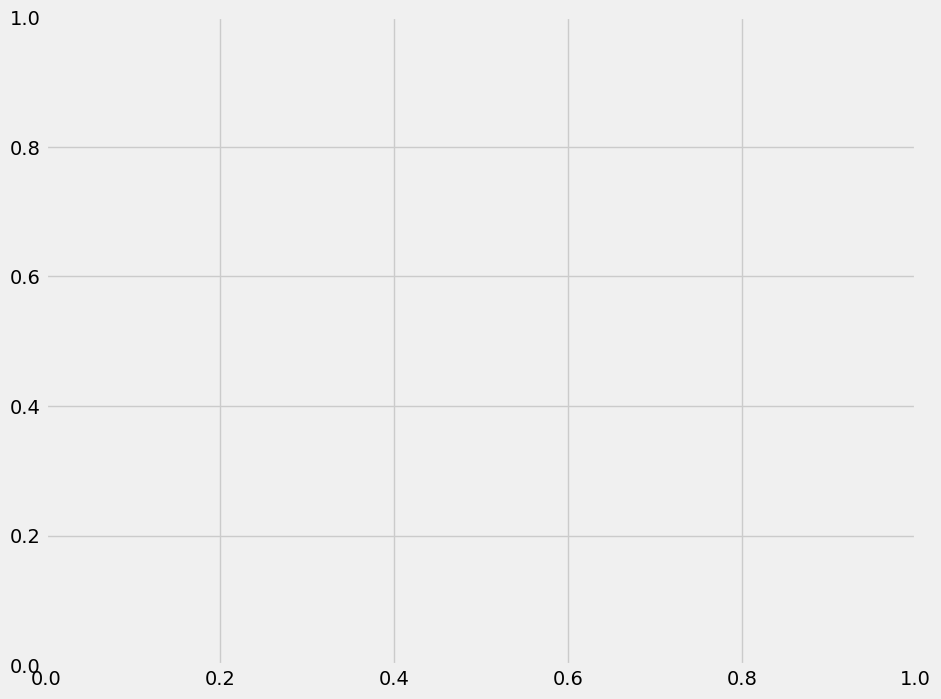

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv('/home/abdelhaq/Documents/Tseries/archive/PJMW_hourly.csv')

# Convertir la colonne 'Datetime' en format datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extraire le mois dans une nouvelle colonne 'mounth'
df['mounth'] = df['Datetime'].dt.month

# Vérification des colonnes et des premières lignes
print(df.columns)
print(df.head())

# Création du boxplot
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='mounth', y='NI_MW')
ax.set_title('NI_MW by Month')
plt.xlabel('Month')
plt.ylabel('NI_MW')
plt.show()


# Create our model


In [13]:
reg = xbg.XBGRegressor
create_feature(train)


NameError: name 'xbg' is not defined

In [ ]:
train = create_feature(train)
test = create_feature(test)

FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'PJME_MW'

